In [1]:
from IPython.core.display import HTML
HTML("\n".join(open('mioti_style.css', 'r').readlines()))

<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Machine Learning</center>
# Challenge S2: Reconocimiento de dígitos

## Objetivo

Nuestro objetivo en este challenge es implementar un mecanismo automático que a partir de una imagen de un cheque sea capaz de reconocer la cantidad manuscrita que hay en el mismo.

<img src="cheque.jpg">

Para ello trabajaremos con un dataset abierto denominado `digits` que contiene dígitos manuscritos etiquetados.

## Configuración del entorno

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

## Carga de datos

En esta ocasión vamos a utilizar una dataset denominado 'digits' que contiene imágenes de números manuscritos.

Este dataset está disponible dentro de los datasets de `sklearn` y podemos cargarlo en memoria de la siguiente manera:

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

Inspeccionando el dataset podemos ver que es un diccionario. Vamos a navegar un poco en sus propiedades:

In [5]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

En la etiqueta `DESCR` tenemos la descripción del dataset:

In [6]:
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

Podemos ver que en la variable `data` están almacenados los datos.

In [7]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [8]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [9]:
print(digits.data.shape)

(1797, 64)


Y viendo su estructura, concluimos que contiene $1797$ instancias, cada una contiene $64$ características.

Además hay un vector:

In [10]:
print(digits.target)

[0 1 2 ... 8 9 8]


In [11]:
print(len(digits.target))

1797


In [12]:
print(digits.target.shape)

(1797,)


Que contiene la clase real de cada instancia.

Tambien disponemos de las imagenes sin "aplanar". Pero para el entrenamiento y las predicciones usamos las imagenes "aplanadas".

In [13]:
print (digits.images.shape)

(1797, 8, 8)


Para estar seguros de que estamos interpretando el dataset podemos dibujarlo de la siguiente manera:

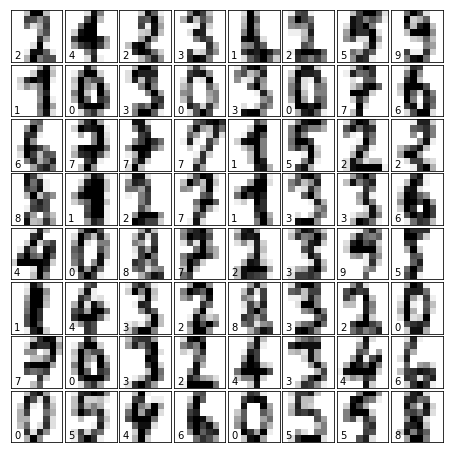

In [14]:
import random

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

random.seed(42)
for i in range(64):
    pos = random.randint(0, len(digits.images) - 1)
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[pos], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[pos]))

In [15]:
print("Valor maximo de codificacion de los pixeles: ",np.max(digits.data))
print("Valor minimo de codificacion de los pixeles: ",np.min(digits.data))

Valor maximo de codificacion de los pixeles:  16.0
Valor minimo de codificacion de los pixeles:  0.0


## Conjunto de entrenamiento y test

Divide el conjunto de datos en 2 grupos: entrenamiento y test con una proporción de reparto del 30% (70% entrenamiento, 30% test)

* ¿Cuántos elementos tiene el conjunto de entrenamiento? ¿Y el de test?

In [16]:
dataset_X = digits.data
dataset_Y = digits.target

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_Y, test_size=.3, random_state=42)

In [18]:
len(X_train)
len(y_train)

1257

In [19]:
len(X_test)
len(y_test)

540

El conjunto de entrenamiento 1257 elementos y el de test 540

## Clasificador logístico

Entrena un clasificador logístico para reconocer digitos.

* ¿Qué porcentaje de acierto obtienes?
* ¿Cuales son las clases que más se equivocan entre sí? ¿son lógicos los resultados?

In [20]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

In [21]:
X_train

array([[ 0.,  0.,  5., ..., 10.,  0.,  0.],
       [ 0.,  0.,  3., ...,  0.,  0.,  0.],
       [ 0.,  0.,  5., ..., 16., 11.,  2.],
       ...,
       [ 0.,  0.,  9., ..., 16.,  2.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  1.,  0.,  0.]])

In [22]:
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
y_predicted = logistic.predict(X_test)

In [24]:
print(y_predicted)

[6 9 3 7 2 1 5 2 5 2 1 8 4 0 4 2 3 7 8 8 4 3 9 7 1 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 4 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 3 9 3 8 7 2 9 0 4 5 3 6 5 8 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 2 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 1 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 5 8 5 5 1 5 2 8 8 9 8 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 8 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 8 0 6 2 0 7 9 1 9 5 2 7 7 1 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 8 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 2 9 0 7 5 8 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5 7 2 0 8 7 3 7 0 2 2 3 5 8 7 3 6 5 9 9 2 1 6 3 0 7 1 1 9 6 1 8
 0 0 2 9 3 9 9 3 7 7 1 3 

In [25]:
print(y_predicted)
print(y_test)

[6 9 3 7 2 1 5 2 5 2 1 8 4 0 4 2 3 7 8 8 4 3 9 7 1 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 4 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 3 9 3 8 7 2 9 0 4 5 3 6 5 8 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 2 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 1 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 5 8 5 5 1 5 2 8 8 9 8 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 8 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 8 0 6 2 0 7 9 1 9 5 2 7 7 1 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 8 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 2 9 0 7 5 8 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5 7 2 0 8 7 3 7 0 2 2 3 5 8 7 3 6 5 9 9 2 1 6 3 0 7 1 1 9 6 1 8
 0 0 2 9 3 9 9 3 7 7 1 3 

In [26]:
np.mean(y_predicted == y_test)

0.9537037037037037

In [27]:
print(logistic.score(X_test, y_test))

0.9537037037037037


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predicted)

array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 43,  1,  0,  0,  0,  0,  0,  6,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  1,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 59,  0,  0,  0,  0,  0],
       [ 0,  2,  1,  0,  0, 61,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0,  1, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 41,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5, 54]])

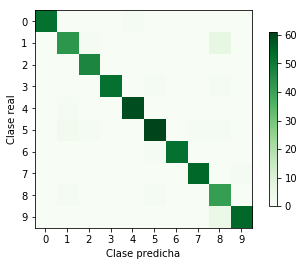

In [29]:
plt.imshow(confusion_matrix(y_test, y_predicted), cmap="Greens")
plt.colorbar(shrink=0.8)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Clase predicha")
plt.ylabel("Clase real");

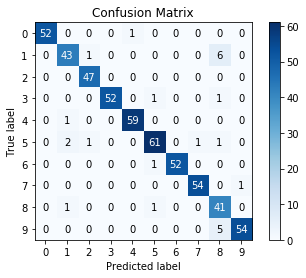

In [30]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_predicted)

El porcentaje de acierto con la funcion elegida es 95,37%. Además, con la Confusion Matrix, podemos observar que los elementos que más error presetnan es en el número 8; que se predice en 11 ocasiones en total de forma errrónea con los números 9 y 1. Esto puede tener sentido debido a la caligrafía similar entre estos números.

## Perceptrón multicapa

Entrena un perceptrón multicapa con los datos anteriores (revisa el worksheet si no te acuerdas de como hacerlo).

* ¿Qué porcentaje de acierto obtienes?
* ¿Cuales son las clases que más se equivocan entre sí?
* Compara los resultados del perceptrón y el logístico

In [31]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()

In [32]:
nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [33]:
y_predicted_nn = nn.predict(X_test)

In [34]:
np.mean(y_predicted_nn == y_test)

0.975925925925926

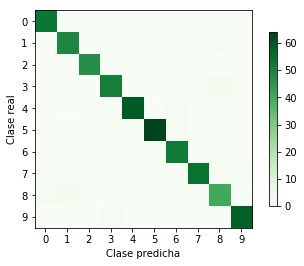

In [35]:
plt.imshow(confusion_matrix(y_test, y_predicted_nn), cmap="Greens")
plt.colorbar(shrink=0.8)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Clase predicha")
plt.ylabel("Clase real");

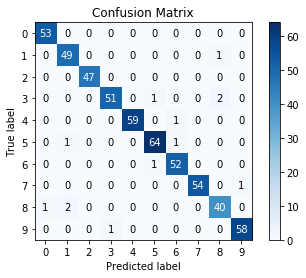

In [36]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_predicted_nn)

El porcentaje de acierto con la funcion elegida es 97,59%; algo más del 2% de precisión que con el algoritmo Logistic. Además, con la Confusion Matrix, podemos observar que los elementos que más error presetnan son los números 5 y 8; que se predicen en 3 y 4 ocasiones en total de forma errrónea, respectivamente. En general, estos errores so de menor magnitud con el algoritmo Perceptrón.

## Análisis de resultados

Analiza con más detalle los resultados del perceptrón. 

* ¿Podrías dibujar los casos en los que se equivoca?.
* Revisando los casos que se equivoca... ¿podrías identificar casos que son outliers? (casos que se equivoca pero es lógico porque no están bien etiquetados en el dataset original)

Tip: Apoyate en la función `dibuja_digito`.

In [37]:
def dibuja_digito(index, data_feature, real_class, predicted_class):
    fig = plt.figure(figsize=(2, 2))
    plt.imshow(data_feature.reshape(8,8), cmap=plt.cm.binary, interpolation='nearest')
    plt.text(10, 5, "Index: " + str(index))
    plt.text(10, 6, "Real: " + str(real_class))
    plt.text(10, 7, "Predicted: " + str(predicted_class))

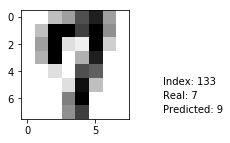

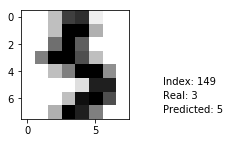

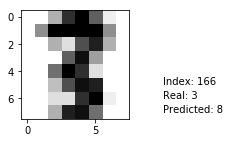

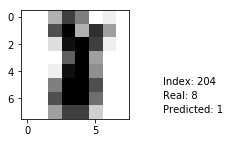

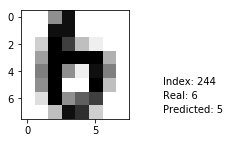

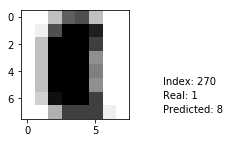

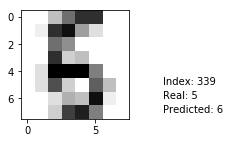

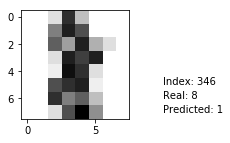

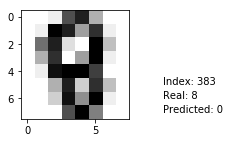

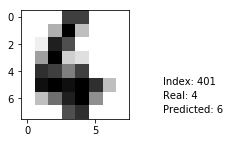

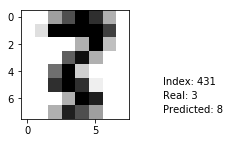

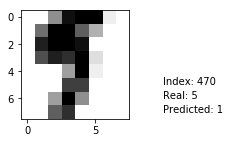

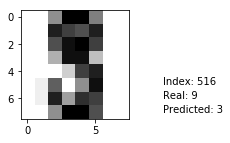

In [38]:
#i, = np.where(y_test != y_predicted_nn)
for index, ytest in enumerate(y_test):
    if (ytest != y_predicted_nn[index]):
        dibuja_digito(index, X_test[index], y_test[index], y_predicted_nn[index])

Sobre los resultados se puede inferir que es posible que para algunos casos la imagen represente otro número que el que tenemos en el input del dataset X de las imágenes. Se escogen los casos cuyos índices son: 149, 516, 496, 339 y 239

## Eliminación de outliers

Elimina los outliers del dataset de test, vuelve a entrenar la red neuronal con un random seed aleatorio y comprueba los resultados con el nuevo dataset de test reducido.

    * Analiza los resultados
    * ¿Es correcto lo que hemos hecho?
    * ¿Que crees que sucedería si eliminasemos tambien los outliers del dataset de entrenamiento?. ¿Mejorarian los resultados?. Solo elabora una respuesta, no es necesario implementar esto en codigo.


In [39]:
index = [149, 516, 496, 339, 239]
X_test_out = np.delete(X_test, index, 0)
y_test_out = np.delete(y_test, index, 0)

In [40]:
X_train_extra, X_test_extra, y_train_extra, y_test_extra = train_test_split(dataset_X, dataset_Y, test_size=.3, random_state=50)

In [41]:
X_test_extra.shape

(540, 64)

In [42]:
X_test_out.shape

(535, 64)

In [43]:
y_predicted_nn_extra = nn.predict(X_test_out)

In [44]:
np.mean(y_predicted_nn_extra == y_test_out)

0.9813084112149533

Se han reducido los arrays de tests con los posibles outliers. A la hora de predecir, los resultados son mejores ( 98%)porque los valores erróneos se han eliminado. Esto puede resultar engañoso porque el algoritmo ha predicho una serie más "fácil", en términos de evaluar los casos más complicados.

Quizás resultaría conveniente eliminar los outliers del dataset original, realizando un pre-procesado de los arrays para introducir en el algoritmo un array más limpio. En este caso el algoritmo puede entranrse con casos siempre reales para perfeccionarlo

No obstante, en modelos no supervisados, entiendo que estos casos erróneos pueden suceder y el algoritmo debe estar preparado, por lo que también dependerá de la aplicación final del algoritmo.


## (Extra) Evalúa tus propias imágenes con el modelo entrenado

Genera una imagen de 32x32 píxels y escribe un número en ella. A continuación reconócelo con el mejor modelo que hayas
obtenido en los pasos anteriores.

Recuerda que en la descripción del dataset se especifica como deben ser los números de entrada:

* Imágenes de 8x8 con valores en escala de grises entre 0 y 16
* Número en blanco sobre un fondo negro.

Por último:

* Evalua los resultados obtenidos. ¿cómo podríamos mejorarlos?

In [45]:
from skimage import data, io, filters
img = io.imread("tu_digito.png")

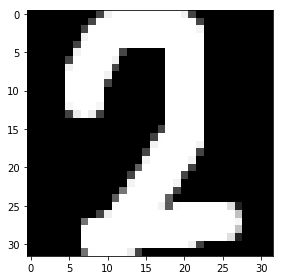

In [46]:
io.imshow(img)
io.show()

In [47]:
print(img)

[[[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 ...

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]]
